In [1]:
import pandas as pd
import sympy as sp
import numpy as np
from scipy.interpolate import CubicHermiteSpline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("data.csv")
df

,y,x1,x2,x3
0,10,0.0,1.0,1.0
1,9,1.0,0.0,2.0
2,8,2.0,1.0,3.0
3,7,NaN,2.0,5.0
4,6,4.0,1.0,NaN
5,5,5.0,1.0,7.0
6,4,5.0,0.0,9.0
7,2,6.0,NaN,9.0
8,2,6.0,2.0,NaN
9,0,7.0,1.0,12.0


In [3]:
df.describe()

,y,x1,x2,x3
count,10.000000,9.00000,9.000000,8.000000
mean,5.300000,4.00000,1.000000,6.000000
std,3.301515,2.44949,0.707107,3.891382
min,0.000000,0.00000,0.000000,1.000000
25%,2.500000,2.00000,1.000000,2.750000
50%,5.500000,5.00000,1.000000,6.000000
75%,7.750000,6.00000,1.000000,9.000000
max,10.000000,7.00000,2.000000,12.000000


In [4]:
columns = df.columns.to_list()

In [5]:
for column in columns:
	df_col = df[column]
	count_digit = df_col.count()
	sum_digit = df_col.sum()
	print(f"Ср.ариф = {sum_digit / count_digit}\tМедиана = {df_col.median()}")

Ср.ариф = 5.3	Медиана = 5.5
Ср.ариф = 4.0	Медиана = 5.0
Ср.ариф = 1.0	Медиана = 1.0
Ср.ариф = 6.0	Медиана = 6.0


In [6]:
df_y = df["y"]
df_y_iloc = df_y.iloc

In [7]:
print("Начальные данные")
print(df)
print("-" * 100)

for column in columns[1:]:
	df_col = df[column].copy()

	miss_index = df_col.isna()
	miss_index = list(miss_index[miss_index].index)
	
	print(f"Изменения в столбце {column}")
	for index in miss_index:
		df_iloc = df_col.iloc
		
		if index == len(df_col) - 1:
			x1, y1 = index - 2, df_iloc[index - 2]
			x2, y2 = index - 1, df_iloc[index - 1]
		else:
			x1, y1 = index - 1, df_iloc[index - 1]
			x2, y2 = index + 1, df_iloc[index + 1]
		
		y_value = y1 + (y2 - y1) * (index - x1) / (x2 - x1)

		print(f"Заменили NaN в {index} строке на {y_value}")
		df_iloc[index] = y_value
	
	print("\n")
	
	# print(df_iloc[:])
	df[column] = df_iloc[:]

print("Преобразованная таблица")
print(df)

Начальные данные
    y   x1   x2    x3
0  10  0.0  1.0   1.0
1   9  1.0  0.0   2.0
2   8  2.0  1.0   3.0
3   7  NaN  2.0   5.0
4   6  4.0  1.0   NaN
5   5  5.0  1.0   7.0
6   4  5.0  0.0   9.0
7   2  6.0  NaN   9.0
8   2  6.0  2.0   NaN
9   0  7.0  1.0  12.0
----------------------------------------------------------------------------------------------------
Изменения в столбце x1
Заменили NaN в 3 строке на 3.0


Изменения в столбце x2
Заменили NaN в 7 строке на 1.0


Изменения в столбце x3
Заменили NaN в 4 строке на 6.0
Заменили NaN в 8 строке на 10.5


Преобразованная таблица
    y   x1   x2    x3
0  10  0.0  1.0   1.0
1   9  1.0  0.0   2.0
2   8  2.0  1.0   3.0
3   7  3.0  2.0   5.0
4   6  4.0  1.0   6.0
5   5  5.0  1.0   7.0
6   4  5.0  0.0   9.0
7   2  6.0  1.0   9.0
8   2  6.0  2.0  10.5
9   0  7.0  1.0  12.0


In [8]:
df = pd.read_csv("data.csv")
df

,y,x1,x2,x3
0,10,0.0,1.0,1.0
1,9,1.0,0.0,2.0
2,8,2.0,1.0,3.0
3,7,NaN,2.0,5.0
4,6,4.0,1.0,NaN
5,5,5.0,1.0,7.0
6,4,5.0,0.0,9.0
7,2,6.0,NaN,9.0
8,2,6.0,2.0,NaN
9,0,7.0,1.0,12.0


In [9]:
def interpolate_nan_hermite(column):
	mask = ~column.isna()

	x = np.arange(len(column))[mask]
	y = column[mask].values
	dy = df["y"].to_numpy()[mask]
	cs = CubicHermiteSpline(x, y, dy)
	x_all = np.arange(len(column))
	interpolated = cs(x_all)
	result = column.copy()
	result[~mask] = interpolated[~mask]
	return result

print("Начальные данные")
print(df)
print("-" * 100)
print("Места, которые необходимо заполнить\n")
print(df.isna().sum())
print("-" * 100)

columns = df.columns.to_list()

for col in columns[1:]:
	if df[col].isna().any():
		df[col] = interpolate_nan_hermite(df[col])

print("Преобразованные данные")
print(df)
print("-" * 100)
print("Места, которые заполнились\n")
print(df.isna().sum())
# df.to_csv("data_new.csv", index=False)

Начальные данные
    y   x1   x2    x3
0  10  0.0  1.0   1.0
1   9  1.0  0.0   2.0
2   8  2.0  1.0   3.0
3   7  NaN  2.0   5.0
4   6  4.0  1.0   NaN
5   5  5.0  1.0   7.0
6   4  5.0  0.0   9.0
7   2  6.0  NaN   9.0
8   2  6.0  2.0   NaN
9   0  7.0  1.0  12.0
----------------------------------------------------------------------------------------------------
Места, которые необходимо заполнить

y     0
x1    1
x2    1
x3    2
dtype: int64
----------------------------------------------------------------------------------------------------
Преобразованные данные
    y   x1   x2    x3
0  10  0.0  1.0   1.0
1   9  1.0  0.0   2.0
2   8  2.0  1.0   3.0
3   7  3.5  2.0   5.0
4   6  4.0  1.0   6.5
5   5  5.0  1.0   7.0
6   4  5.0  0.0   9.0
7   2  6.0  1.5   9.0
8   2  6.0  2.0  11.0
9   0  7.0  1.0  12.0
----------------------------------------------------------------------------------------------------
Места, которые заполнились

y     0
x1    0
x2    0
x3    0
dtype: int64


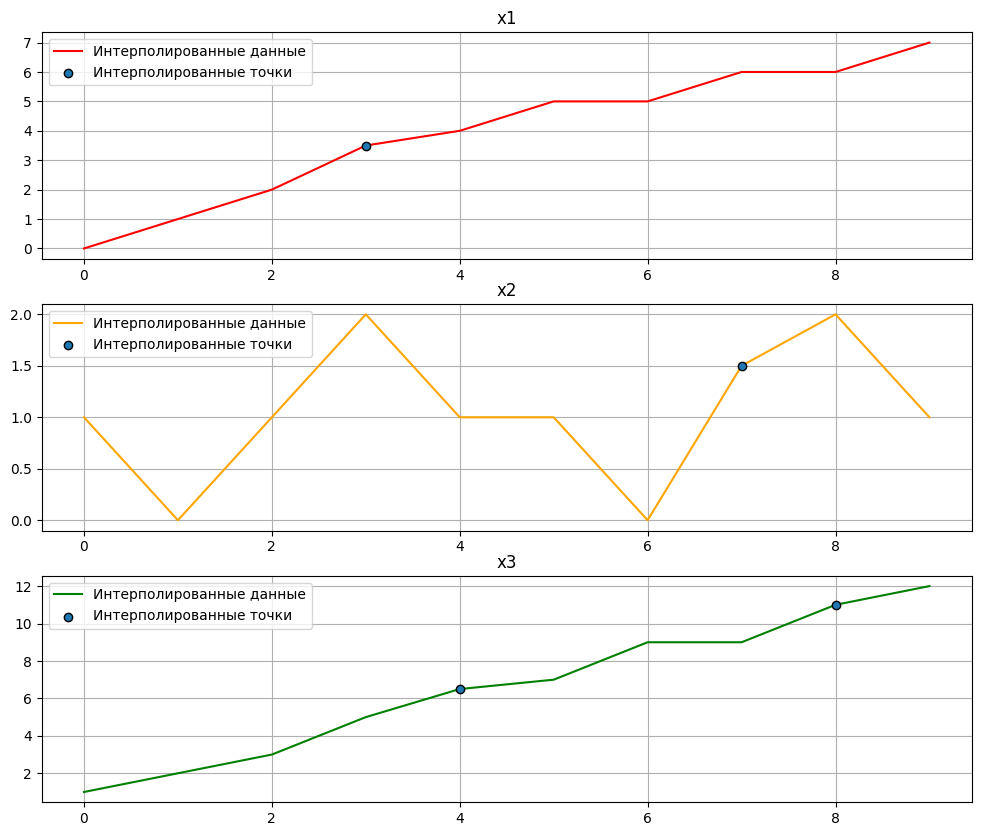

In [10]:
df = pd.read_csv("data.csv")

def interpolate_nan_hermite(column):
	mask = ~column.isna()

	x = np.arange(len(column))[mask]
	y = column[mask].values
	dy = df["y"].to_numpy()[mask]
	# dy = np.gradient(x, y)
	cs = CubicHermiteSpline(x, y, dy)
	x_all = np.arange(len(column))
	interpolated = cs(x_all)
	result = column.copy()
	result[~mask] = interpolated[~mask]
	return result, mask

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

colors = ["red", "orange", "green"]

columns = df.columns.to_list()
for i, col in enumerate(columns[1:]):
    if df[col].isna().any():
        df[col], mask = interpolate_nan_hermite(df[col])

        ax[i].plot(np.arange(len(df)), df[col], color=colors[i], label="Интерполированные данные")
        ax[i].scatter(np.arange(len(df))[~mask], df[col][~mask], label="Интерполированные точки", ec="k", zorder=3)

        ax[i].set_title(f"{col}")
        ax[i].legend()
        ax[i].grid()

plt.show()

In [11]:
df = pd.read_csv("data_new.csv")
df

,y,x1,x2,x3
0,10,0.0,1.0,1.0
1,9,1.0,0.0,2.0
2,8,2.0,1.0,3.0
3,7,3.5,2.0,5.0
4,6,4.0,1.0,6.5
5,5,5.0,1.0,7.0
6,4,5.0,0.0,9.0
7,2,6.0,1.5,9.0
8,2,6.0,2.0,11.0
9,0,7.0,1.0,12.0


In [12]:
y = df["y"].to_numpy()
y

array([10,  9,  8,  7,  6,  5,  4,  2,  2,  0])

In [13]:
x, a, b = sp.symbols("x a b")

In [14]:
f_lin = a * x + b
f_lin

a*x + b

In [15]:
def phi(func, x_, y):
	return (y - (func.subs(x, x_))) ** 2

In [16]:
def f_diff(func, p):
	return func.diff(p)

In [17]:
def get_funcs(func, x_data, y_data, coef):
	funcs = []
	for p in coef:
		
		res = 0
		for x_coord, y_coord in zip(x_data, y_data):
			phi_ = phi(func, x_coord, y_coord)
			phi_diff = f_diff(phi_, p)
			res += phi_diff
		
		funcs += [res]
	
	return funcs

In [18]:
def f(func, x_data, coef):
	func = func.subs(coef)
	return [func.subs(x, x_) for x_ in x_data]

In [19]:
def r_squared(y_true, y_pred):
    a = np.sum((y_true - y_pred) ** 2)
    b = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (a / b)

In [20]:
columns = df.columns.to_list()

In [21]:
dict_r2 = {
	"Полные данные": [],
	"С удалением строк, где NaN": []
}

---------- Система ----------
408.5*a + 79.0*b - 285.0
79.0*a + 20*b - 106
---------- Система ----------

y = 10.7755313634007 - 1.38621047174702*x
R2 собственное   = 0.242206497377296
R2 из библиотеки = 0.2422064973772956


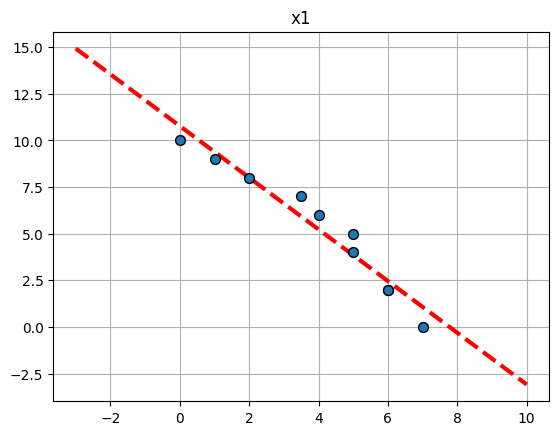

---------- Система ----------
30.5*a + 21.0*b - 100.0
21.0*a + 20*b - 106
---------- Система ----------

y = 6.70414201183432 - 1.33727810650888*x
R2 собственное   = 0.980220191930443
R2 из библиотеки = 0.9802201919304427


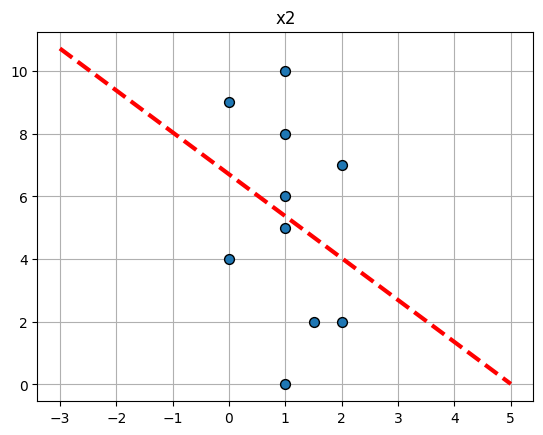

---------- Система ----------
1114.5*a + 131.0*b - 474.0
131.0*a + 20*b - 106
---------- Система ----------

y = 10.9266913628388 - 0.85903684928836*x
R2 собственное   = 0.746342316402731
R2 из библиотеки = 0.7463423164027314


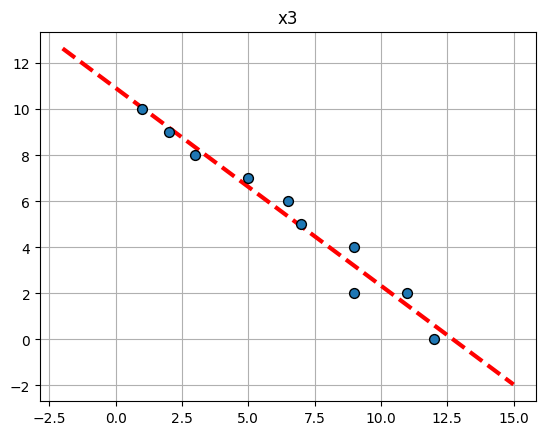

In [22]:
for column in columns[1:]:
	x_data = df[column].to_numpy()
	funcs_lin = get_funcs(f_lin, x_data, y, [a, b])
	coef = sp.solve(funcs_lin)
	
	print("-" * 10, "Система", "-" * 10)
	print(*funcs_lin, sep="\n")
	print("-" * 10, "Система", "-" * 10)
	print(f"\ny = {f_lin.subs(coef)}")
	x_data_lin = np.linspace(min(x_data) - 3, max(x_data) + 3, 10)
	y_data_lin = f(f_lin, x_data_lin, coef)
	print(f"R2 собственное   = {r_squared(y, y_data_lin)}")
	print(f"R2 из библиотеки = {r2_score(y, y_data_lin)}")

	dict_r2["Полные данные"] += [r2_score(y, y_data_lin)]
	
	plt.title(f"{column}")
	plt.scatter(x_data, y, s=50, ec="k", zorder=3)
	plt.plot(x_data_lin, y_data_lin, c="r", ls="--", lw=3)
	plt.grid()
	plt.show()

In [23]:
df = pd.read_csv("data.csv")
df

,y,x1,x2,x3
0,10,0.0,1.0,1.0
1,9,1.0,0.0,2.0
2,8,2.0,1.0,3.0
3,7,NaN,2.0,5.0
4,6,4.0,1.0,NaN
5,5,5.0,1.0,7.0
6,4,5.0,0.0,9.0
7,2,6.0,NaN,9.0
8,2,6.0,2.0,NaN
9,0,7.0,1.0,12.0


In [24]:
df = df.dropna()
df

,y,x1,x2,x3
0,10,0.0,1.0,1.0
1,9,1.0,0.0,2.0
2,8,2.0,1.0,3.0
5,5,5.0,1.0,7.0
6,4,5.0,0.0,9.0
9,0,7.0,1.0,12.0


In [25]:
y = df["y"].to_numpy()
y

array([10,  9,  8,  5,  4,  0])

In [26]:
columns = df.columns.to_list()

---------- Система ----------
208.0*a + 40.0*b - 140.0
40.0*a + 12*b - 72
---------- Система ----------

y = 10.4642857142857 - 1.33928571428571*x
R2 собственное   = 0.347052660349854
R2 из библиотеки = 0.3470526603498544


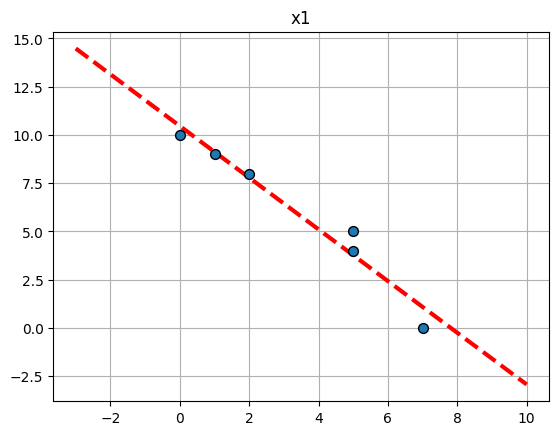

---------- Система ----------
8.0*a + 8.0*b - 46.0
8.0*a + 12*b - 72
---------- Система ----------

y = 6.5 - 0.75*x
R2 собственное   = 0.743035714285714
R2 из библиотеки = 0.7430357142857142


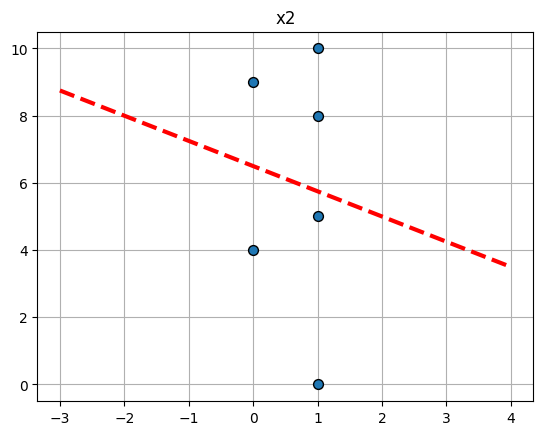

---------- Система ----------
576.0*a + 68.0*b - 246.0
68.0*a + 12*b - 72
---------- Система ----------

y = 10.8146853146853 - 0.84965034965035*x
R2 собственное   = 0.676995626750871
R2 из библиотеки = 0.6769956267508714


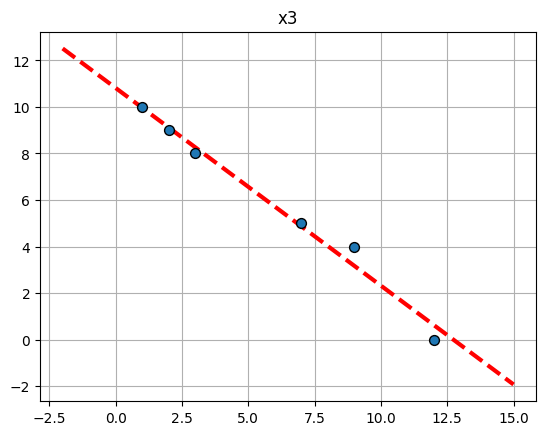

In [27]:
for column in columns[1:]:
	x_data = df[column].to_numpy()
	funcs_lin = get_funcs(f_lin, x_data, y, [a, b])
	coef = sp.solve(funcs_lin)
	
	print("-" * 10, "Система", "-" * 10)
	print(*funcs_lin, sep="\n")
	print("-" * 10, "Система", "-" * 10)
	print(f"\ny = {f_lin.subs(coef)}")
	x_data_lin = np.linspace(min(x_data) - 3, max(x_data) + 3, 6)
	y_data_lin = f(f_lin, x_data_lin, coef)
	print(f"R2 собственное   = {r_squared(y, y_data_lin)}")
	print(f"R2 из библиотеки = {r2_score(y, y_data_lin)}")
	
	dict_r2["С удалением строк, где NaN"] += [r2_score(y, y_data_lin)]

	plt.title(f"{column}")
	plt.scatter(x_data, y, s=50, ec="k", zorder=3)
	plt.plot(x_data_lin, y_data_lin, c="r", ls="--", lw=3)
	plt.grid()
	plt.show()

In [28]:
dict_r2

{'Полные данные': [0.2422064973772956, 0.9802201919304427, 0.7463423164027314],
 'С удалением строк, где NaN': [0.3470526603498544,
  0.7430357142857142,
  0.6769956267508714]}

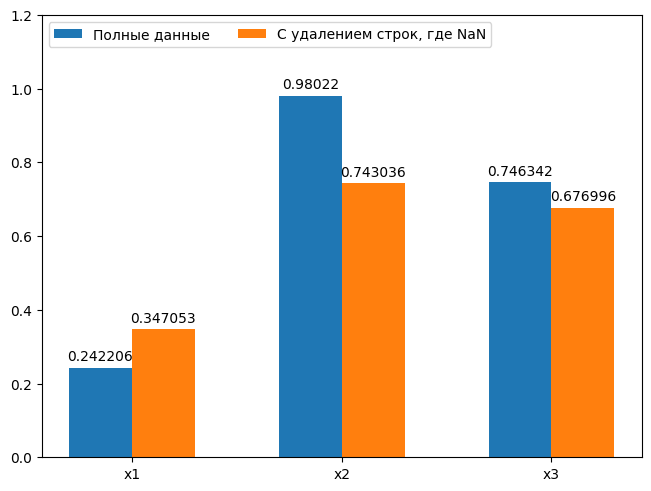

In [29]:
fig, ax = plt.subplots(layout="constrained")

species = columns[1:]

x = np.arange(len(species))
width = 0.3
multiplier = 0

for k, v in dict_r2.items():
	offset = width * multiplier
	rects = ax.bar(x + offset, v, width, label=k)
	ax.bar_label(rects, padding=3)
	multiplier += 1

ax.set_xticks(x + .15, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.2)

plt.tick_params(axis="x")
plt.show()

In [30]:
# a) Из сравнительных метрик, то с полными данными 
# b) Если бы при удаление использовались методы оптимизации данных, 
# 	в которых размерность уменьшается, но качество данных нет - можно было бы сравнить.
# 	В нашем же случае мы просто удаляем данные, следовательно, есть большая вероятность того,
# 	что может потерять важные данные.